In [3]:
%matplotlib inline
import pandas as pd
import soundfile as sf
from python_speech_features import mfcc
from python_speech_features import logfbank
import scipy.io.wavfile as wav
import peakutils

/Users/michaelfarrell/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:1069: UserWarning: Bad val "$TEMPLATE_BACKEND" on line #38
	"backend      : $TEMPLATE_BACKEND
"
	in file "/Users/michaelfarrell/.matplotlib/matplotlibrc"
	Key backend: Unrecognized backend string "$template_backend": valid strings are [u'pgf', u'cairo', u'MacOSX', u'CocoaAgg', u'gdk', u'ps', u'GTKAgg', u'nbAgg', u'GTK', u'Qt5Agg', u'template', u'emf', u'GTK3Cairo', u'GTK3Agg', u'WX', u'Qt4Agg', u'TkAgg', u'agg', u'svg', u'GTKCairo', u'WXAgg', u'WebAgg', u'pdf']
  (val, error_details, msg))
/Users/michaelfarrell/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


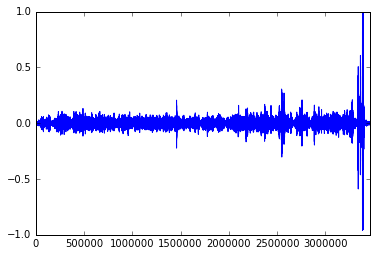

In [4]:
data, samplerate = sf.read('recording.wav')
pd.Series(data).plot()

In [5]:
(rate,sig) = wav.read("recording.wav")
mfcc_feat = mfcc(sig,rate)
mfcc_feat.shape

(7857, 13)

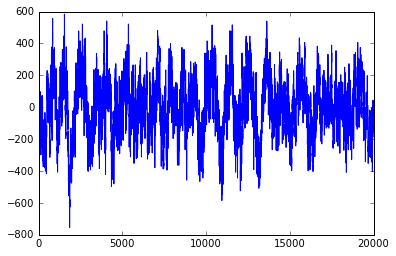

In [6]:
pd.Series(sig[:20000]).plot()

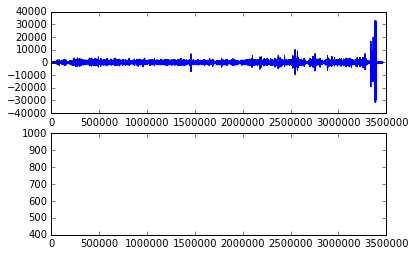

In [10]:
from pylab import *
from matplotlib import *

dt = 0.0005
# 100, 400 and 200 Hz sine 'wave'
t = range(len(sig))
x = sig # the signal
NFFT = 1024       # the length of the windowing segments
Fs = int(1.0/dt)  # the sampling frequency

# modified specgram()
def my_specgram(x, NFFT=256, Fs=2, Fc=0, detrend=mlab.detrend_none,
             window=mlab.window_hanning, noverlap=128,
             cmap=None, xextent=None, pad_to=None, sides='default',
             scale_by_freq=None, minfreq = None, maxfreq = None, **kwargs):
    """
    http://stackoverflow.com/questions/19468923/cutting-of-unused-frequencies-in-specgram-matplotlib
    
    call signature::

      specgram(x, NFFT=256, Fs=2, Fc=0, detrend=mlab.detrend_none,
               window=mlab.window_hanning, noverlap=128,
               cmap=None, xextent=None, pad_to=None, sides='default',
               scale_by_freq=None, minfreq = None, maxfreq = None, **kwargs)

    Compute a spectrogram of data in *x*.  Data are split into
    *NFFT* length segments and the PSD of each section is
    computed.  The windowing function *window* is applied to each
    segment, and the amount of overlap of each segment is
    specified with *noverlap*.

    %(PSD)s

      *Fc*: integer
        The center frequency of *x* (defaults to 0), which offsets
        the y extents of the plot to reflect the frequency range used
        when a signal is acquired and then filtered and downsampled to
        baseband.

      *cmap*:
        A :class:`matplotlib.cm.Colormap` instance; if *None* use
        default determined by rc

      *xextent*:
        The image extent along the x-axis. xextent = (xmin,xmax)
        The default is (0,max(bins)), where bins is the return
        value from :func:`mlab.specgram`

      *minfreq, maxfreq*
        Limits y-axis. Both required

      *kwargs*:

        Additional kwargs are passed on to imshow which makes the
        specgram image

      Return value is (*Pxx*, *freqs*, *bins*, *im*):

      - *bins* are the time points the spectrogram is calculated over
      - *freqs* is an array of frequencies
      - *Pxx* is a len(times) x len(freqs) array of power
      - *im* is a :class:`matplotlib.image.AxesImage` instance

    Note: If *x* is real (i.e. non-complex), only the positive
    spectrum is shown.  If *x* is complex, both positive and
    negative parts of the spectrum are shown.  This can be
    overridden using the *sides* keyword argument.

    **Example:**

    .. plot:: mpl_examples/pylab_examples/specgram_demo.py

    """

    #####################################
    # modified  axes.specgram() to limit
    # the frequencies plotted
    #####################################

    # this will fail if there isn't a current axis in the global scope
    ax = gca()
    Pxx, freqs, bins = mlab.specgram(x, NFFT, Fs, detrend,
         window, noverlap, pad_to, sides, scale_by_freq)

    # modified here
    #####################################
    if minfreq is not None and maxfreq is not None:
        Pxx = Pxx[(freqs >= minfreq) & (freqs <= maxfreq)]
        freqs = freqs[(freqs >= minfreq) & (freqs <= maxfreq)]
    #####################################

    Z = 10. * np.log10(Pxx)
    Z = np.flipud(Z)

    if xextent is None: xextent = 0, np.amax(bins)
    xmin, xmax = xextent
    freqs += Fc
    extent = xmin, xmax, freqs[0], freqs[-1]
    im = ax.imshow(Z, cmap, extent=extent, **kwargs)
    ax.axis('auto')

    return Pxx, freqs, bins, im

# plot
ax1 = subplot(211)
plot(t, x)
subplot(212, sharex=ax1)

# the minfreq and maxfreq args will limit the frequencies 
Pxx, freqs, bins, im = my_specgram(x, NFFT=NFFT, Fs=Fs, noverlap=900, 
                                cmap=cm.Accent, minfreq = 400, maxfreq = 12000)
show()
close()

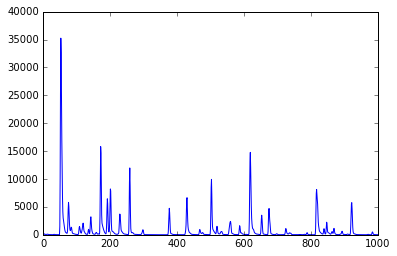

In [20]:
SumPxx = Pxx.sum(axis=0)
plt.plot(SumPxx[2000:3000])

In [12]:
min_thresh = 8000
max_thresh = 100000


In [19]:
Pxx.shape

(308, 27937)

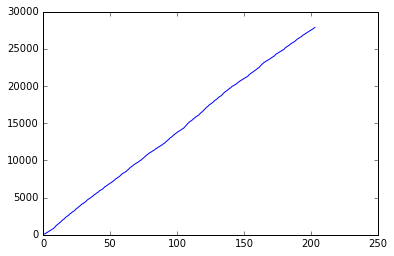

In [22]:


indexes = peakutils.indexes(SumPxx, thres=0.02/Pxx.max(), min_dist=100)
